In [1]:
from pathlib import Path
import os
import sys 
import pandas as pd
from csv import writer  

sys.path.append('/home/samer/projects/fuzzy_sql/src') #This will enable reading the modules
from fuzzy_sql.fuzzy_sql import *

In [2]:
#set paths
root_dir=Path('/home/samer/projects/fuzzy_sql')
real_dir=os.path.join(root_dir,'data/tabular/ready/real')
meta_dir=os.path.join(root_dir,'data/tabular/ready/metadata')
syn_dir=os.path.join(root_dir,'data/tabular/ready/synthetic')

In [3]:
#extract real data names and define paths
ds_names=extract_fnames(real_dir)
# drop trail 5 since there is no synth data for it
ds_names.remove('trial5')
ds_names.remove('oncovid_dtd')
ds_names.remove('trial3')
ds_names.remove('trial6')
#ds_names.remove('danish') #takes time
ds_names.remove('cchs') #takes time

real_path=[]
meta_path=[]
syn_path=[]
for ds_name in ds_names:
    real_path.append(real_dir+f'/{ds_name}.csv')
    meta_path.append(meta_dir+f'/{ds_name}.json')
    syn_path.append(syn_dir+f'/{ds_name}_syn_06.csv')

Extracted the names of 40 real datasets


Table C20 already exists in the database
Table C20_syn_06 already exists in the database
Generated Conditioned Aggregate Query 0 
Generated Conditioned Aggregate Query 1 
Generated Conditioned Aggregate Query 2 
Generated 3 random twin queries and saved results in: ../.runs/C20_1663706394
Table C4 already exists in the database
Table C4_syn_06 already exists in the database
Generated Conditioned Aggregate Query 0 
Generated Conditioned Aggregate Query 1 
Generated Conditioned Aggregate Query 2 
Generated 3 random twin queries and saved results in: ../.runs/C4_1663706394
Table C26 already exists in the database
Table C26_syn_06 already exists in the database
Generated Conditioned Aggregate Query 0 
Generated Conditioned Aggregate Query 1 
Generated Conditioned Aggregate Query 2 
Generated 3 random twin queries and saved results in: ../.runs/C26_1663706394
Table C21 already exists in the database
Table C21_syn_06 already exists in the database
Generated Conditioned Aggregate Query 0 
Gen

/home/samer/projects/fuzzy_sql/src/fuzzy_sql/fuzzy_sql.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax=plt.subplots(1,1,figsize=(12, 6))


Table n0147DFS already exists in the database
Table n0147DFS_syn_06 already exists in the database
Generated Conditioned Aggregate Query 0 
Generated Conditioned Aggregate Query 1 
Generated Conditioned Aggregate Query 2 
Generated 3 random twin queries and saved results in: ../.runs/n0147DFS_1663706397
Table C18 already exists in the database
Table C18_syn_06 already exists in the database
Generated Conditioned Aggregate Query 0 
Generated Conditioned Aggregate Query 1 
Generated Conditioned Aggregate Query 2 
Generated 3 random twin queries and saved results in: ../.runs/C18_1663706398
Table C23 already exists in the database
Table C23_syn_06 already exists in the database
Generated Conditioned Aggregate Query 0 
Generated Conditioned Aggregate Query 1 
Generated Conditioned Aggregate Query 2 
Generated 3 random twin queries and saved results in: ../.runs/C23_1663706398
Table trial2 already exists in the database
Table trial2_syn_06 already exists in the database
Generated Conditione

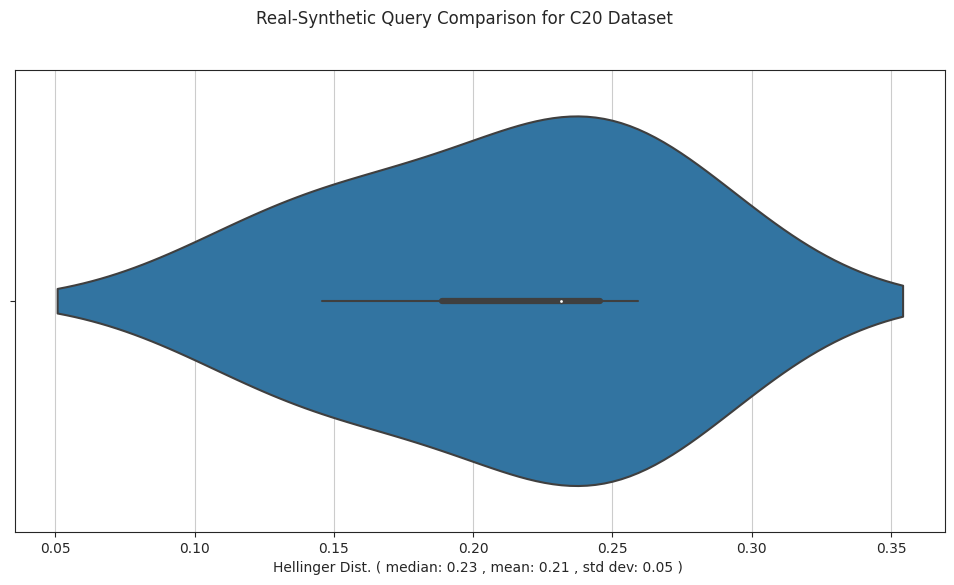

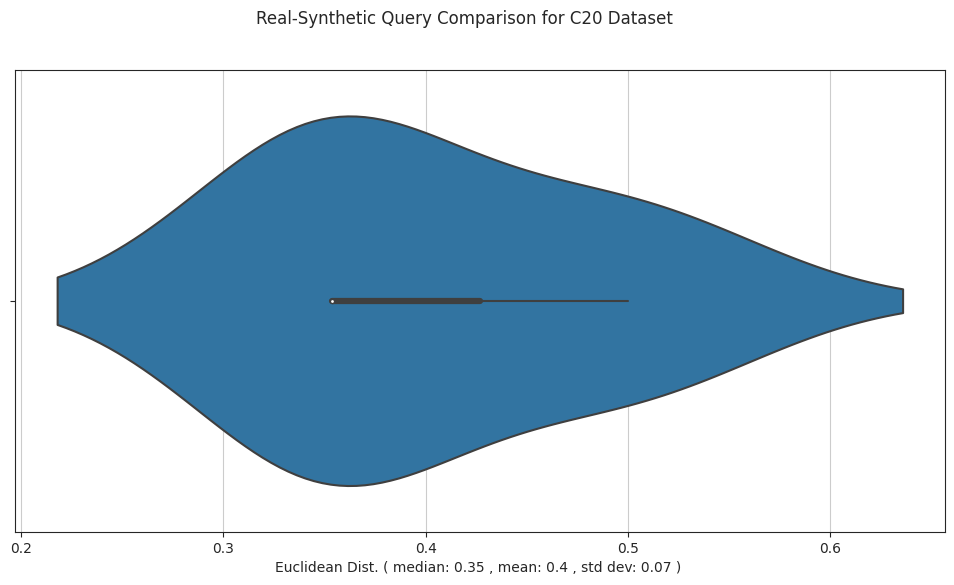

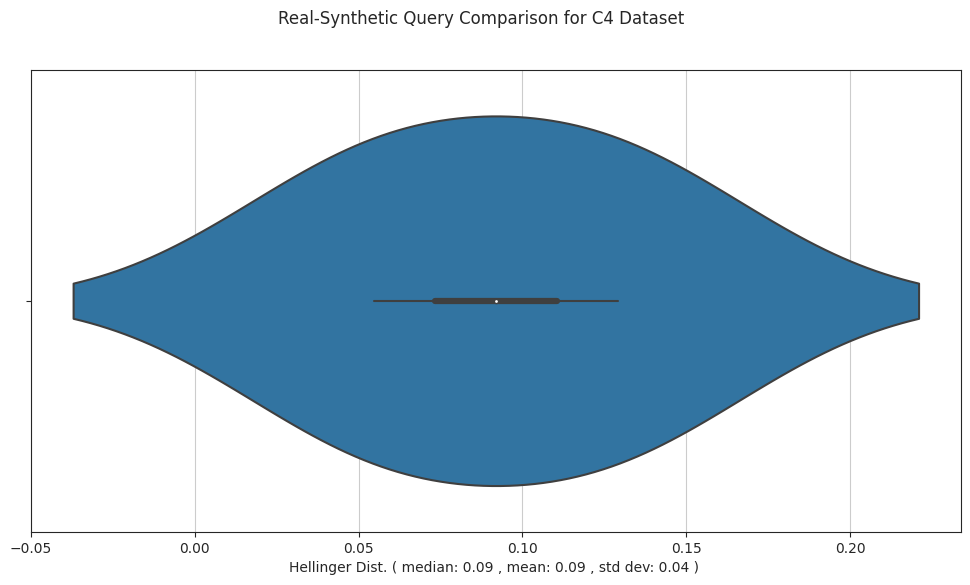

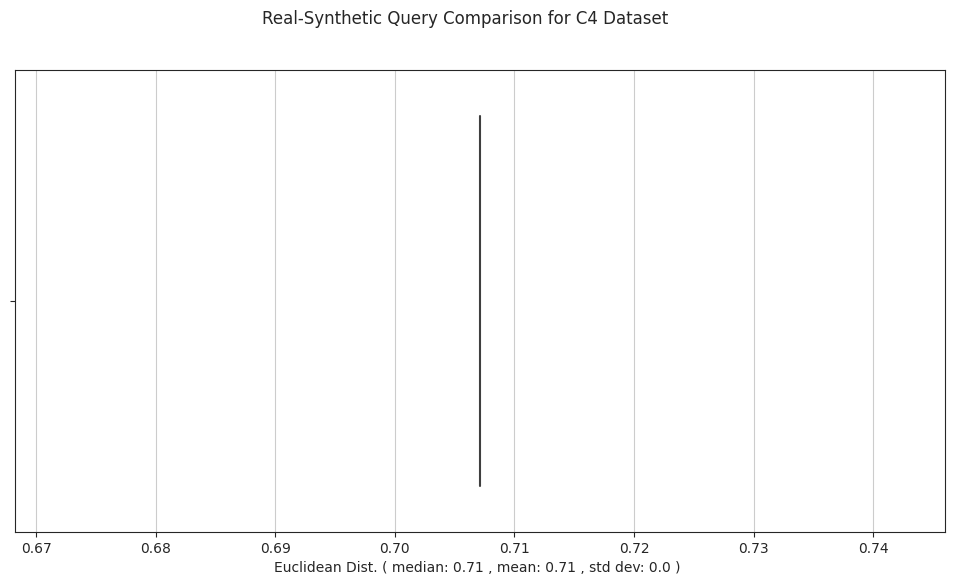

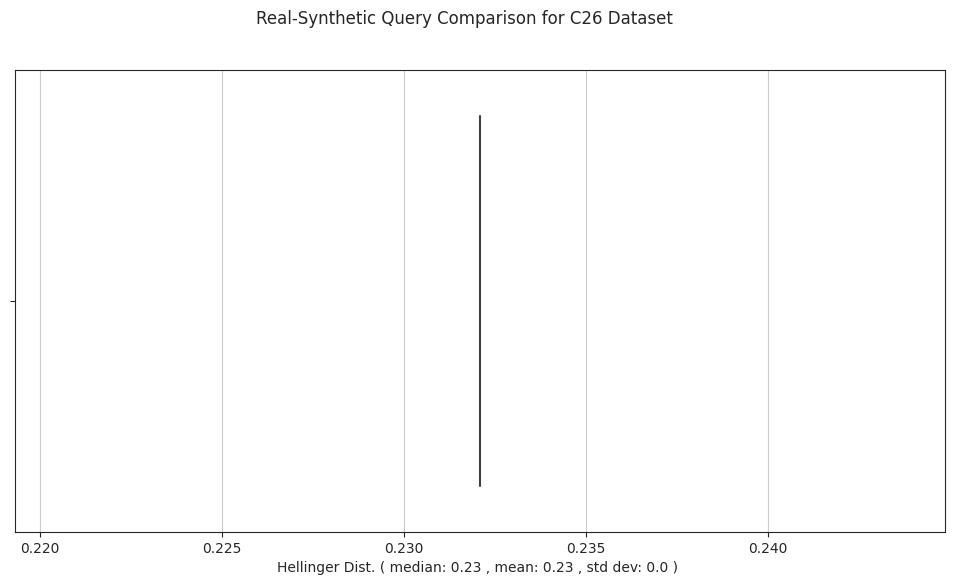

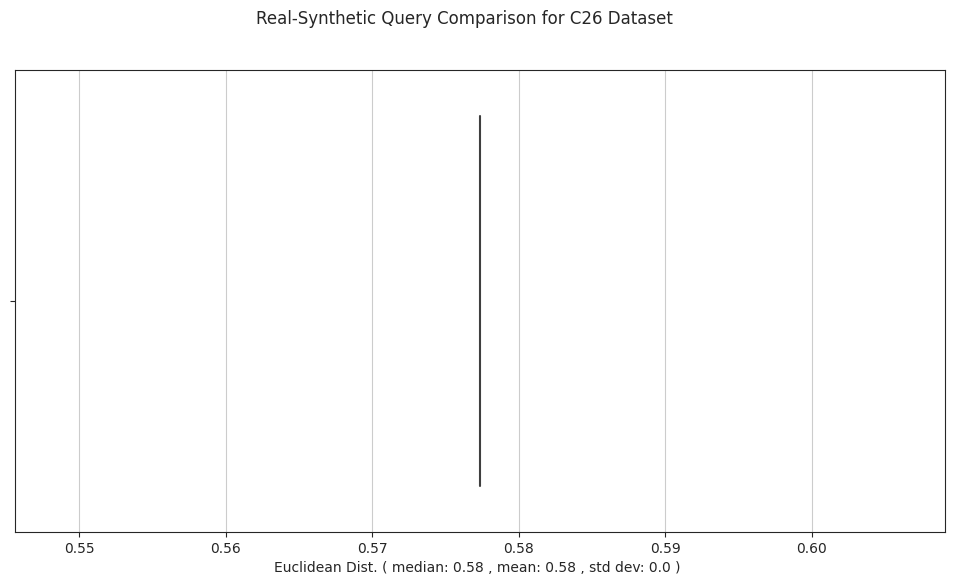

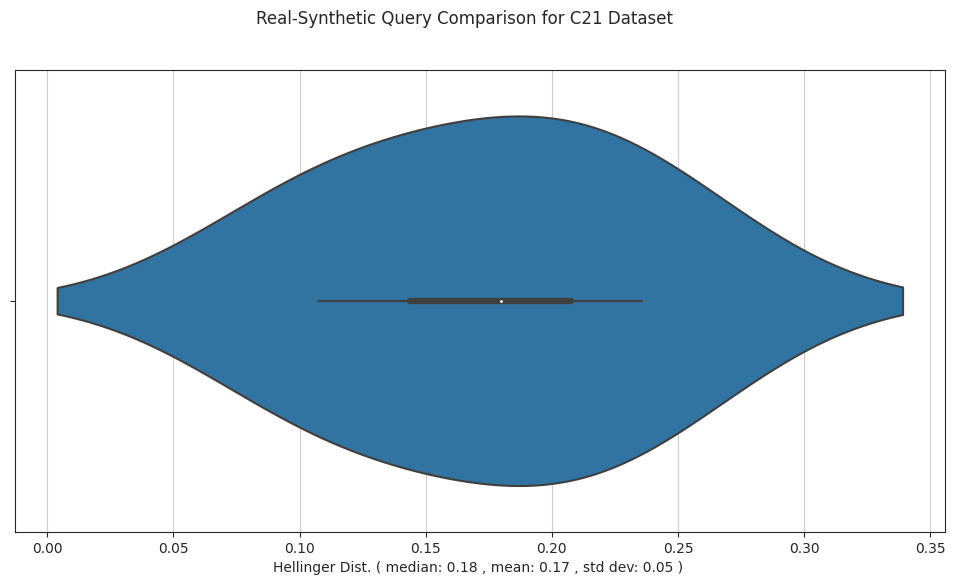

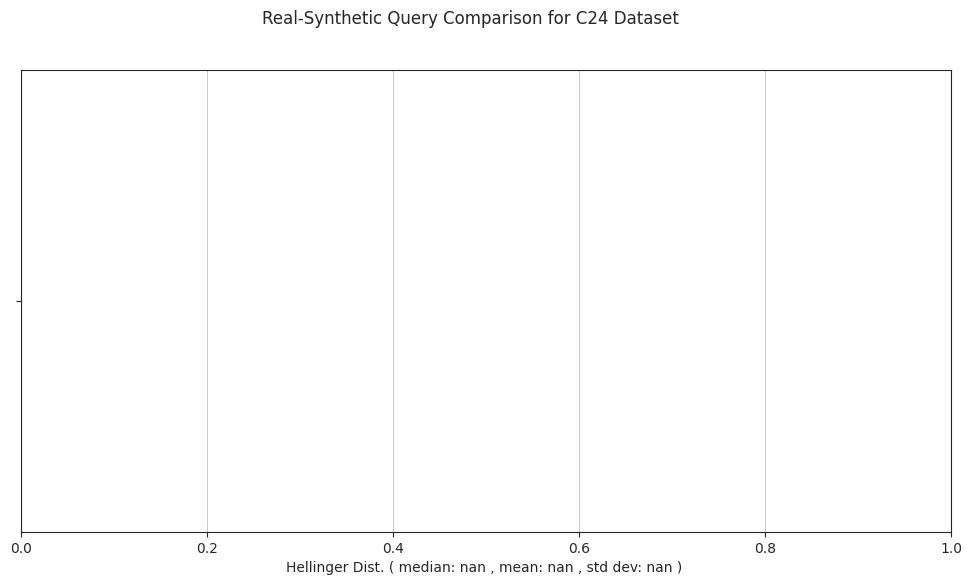

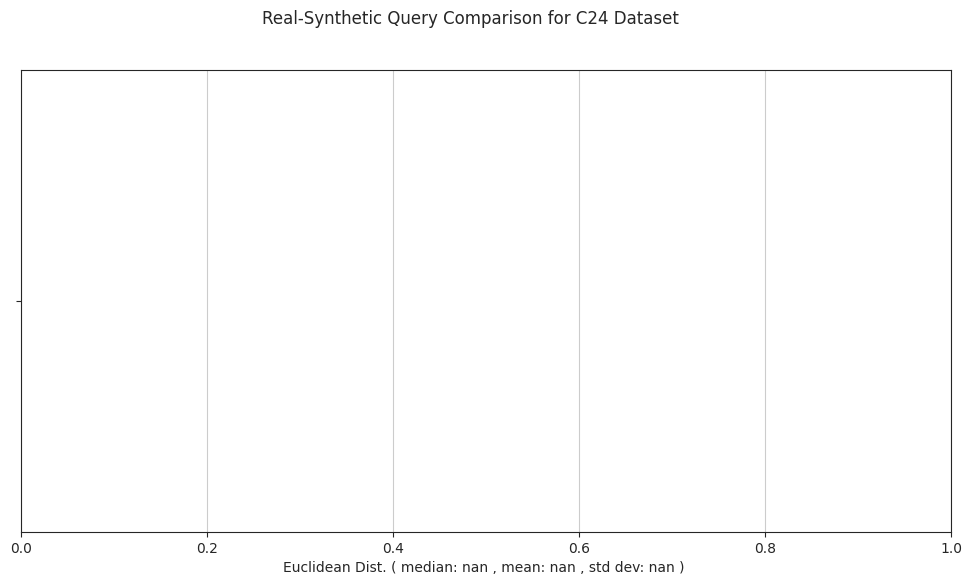

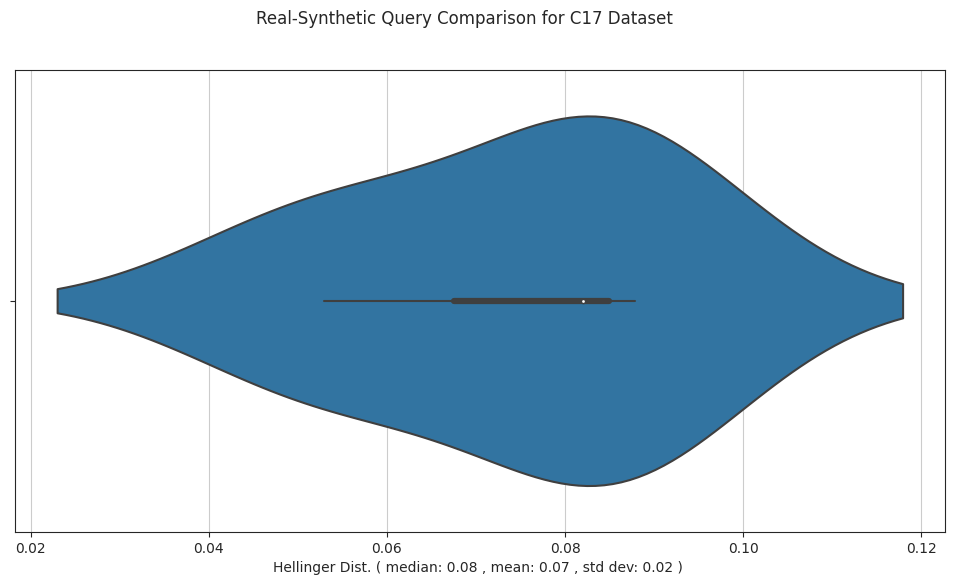

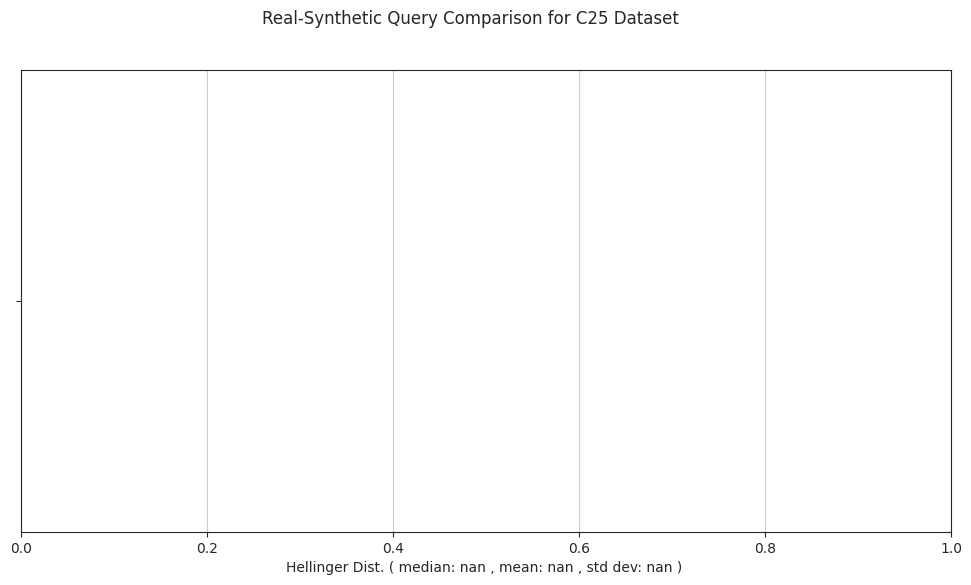

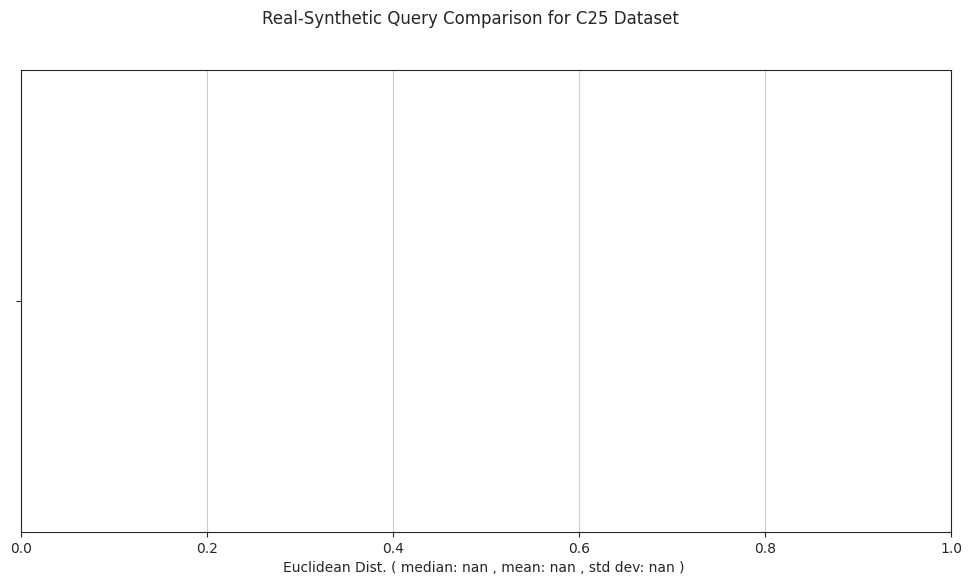

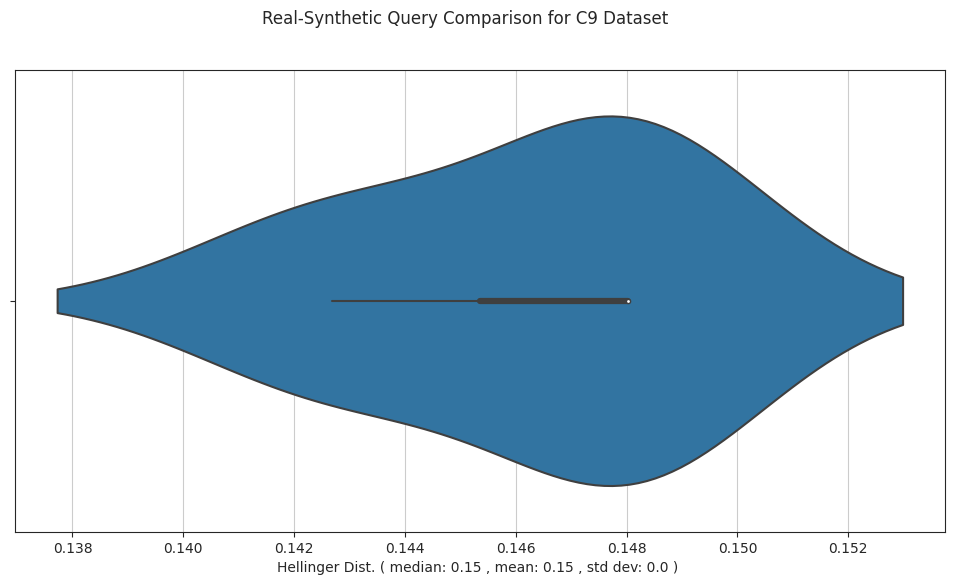

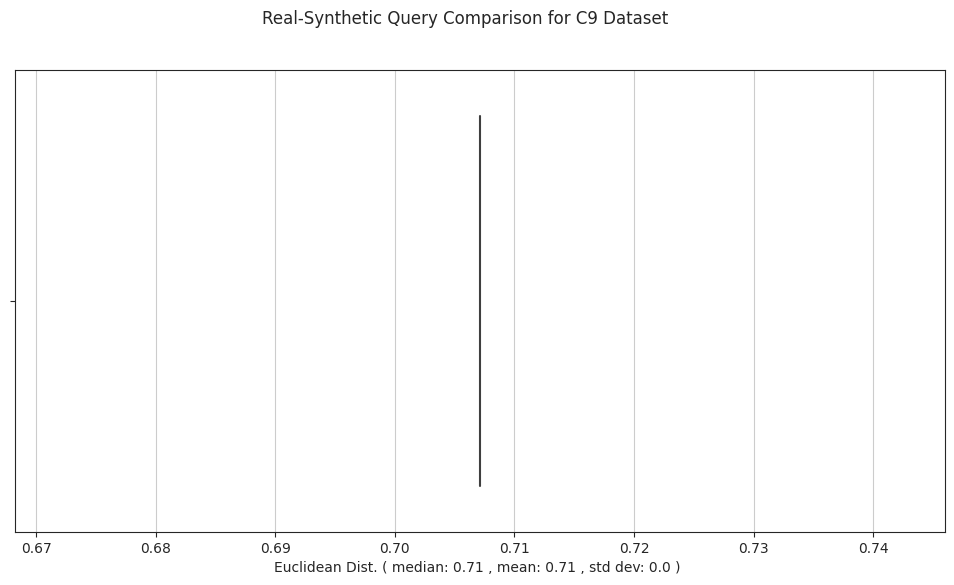

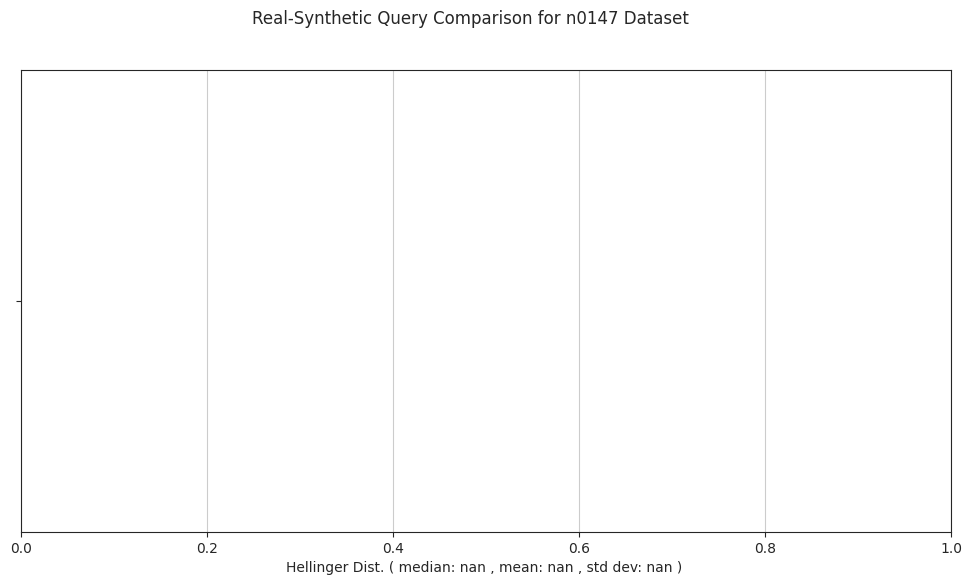

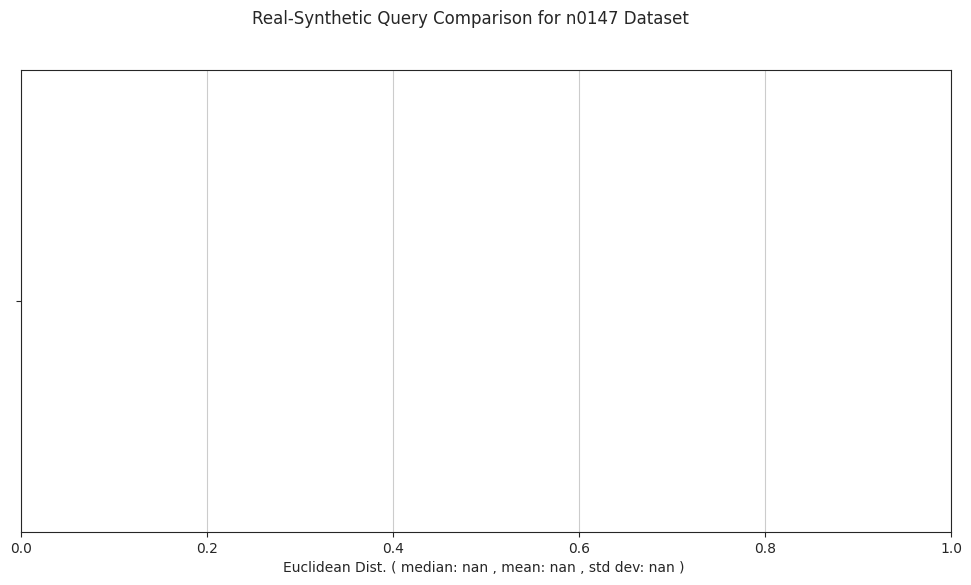

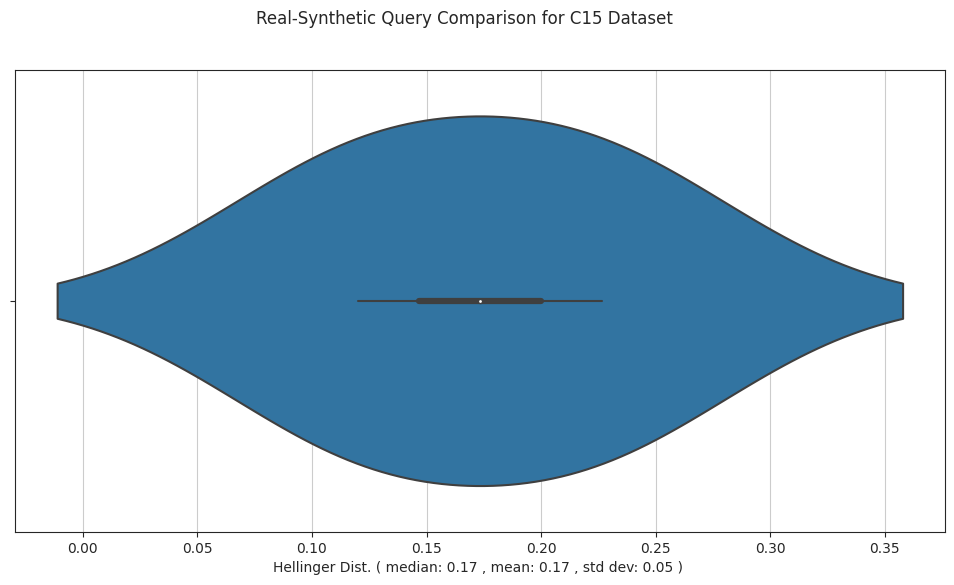

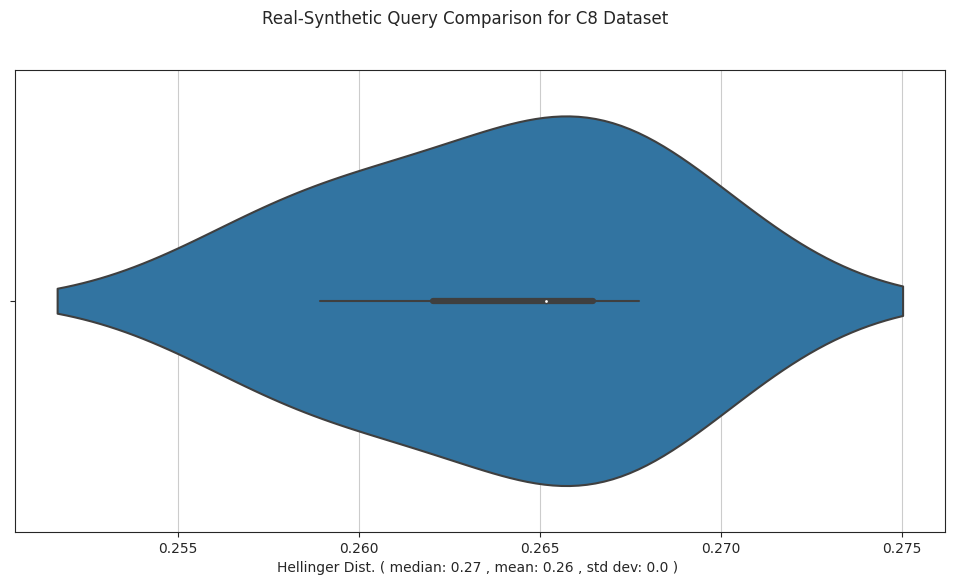

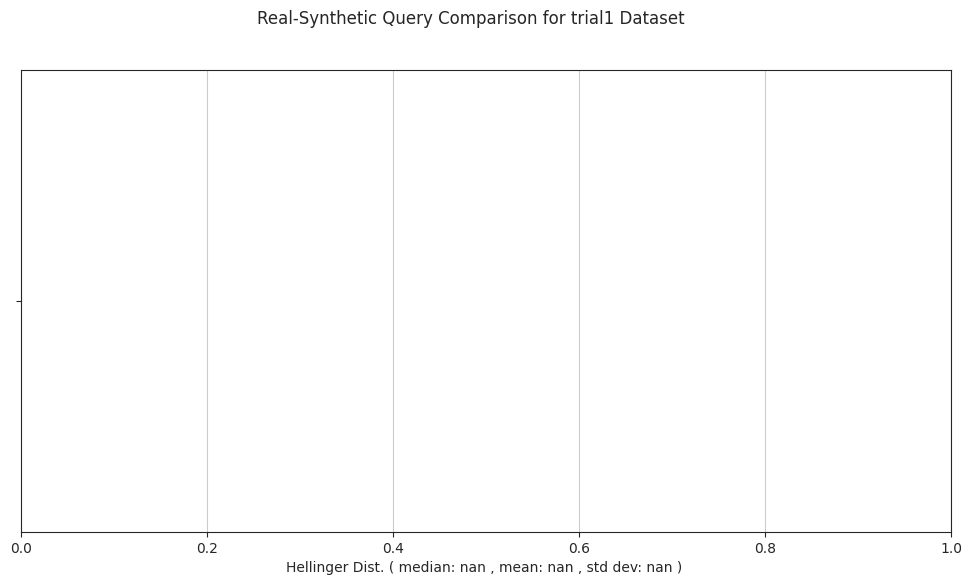

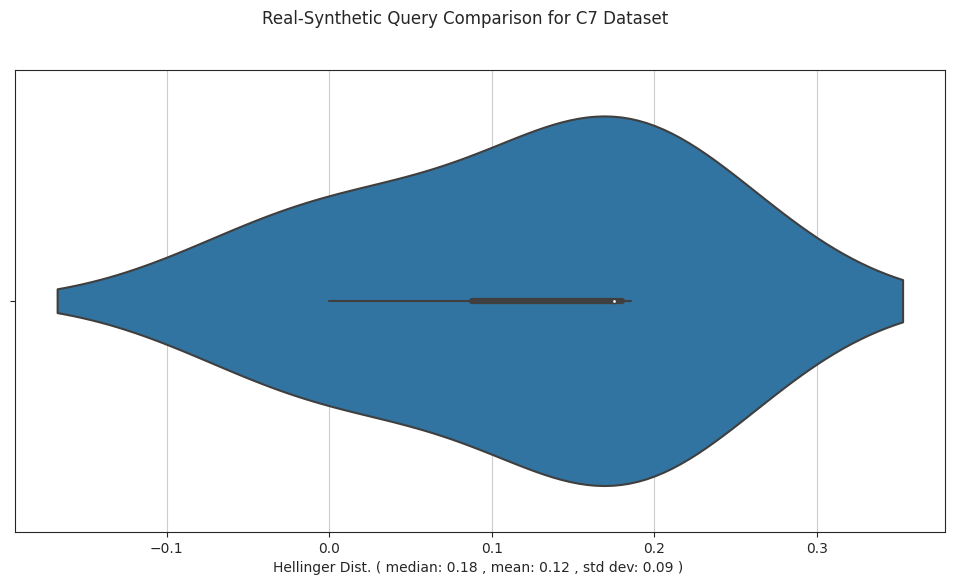

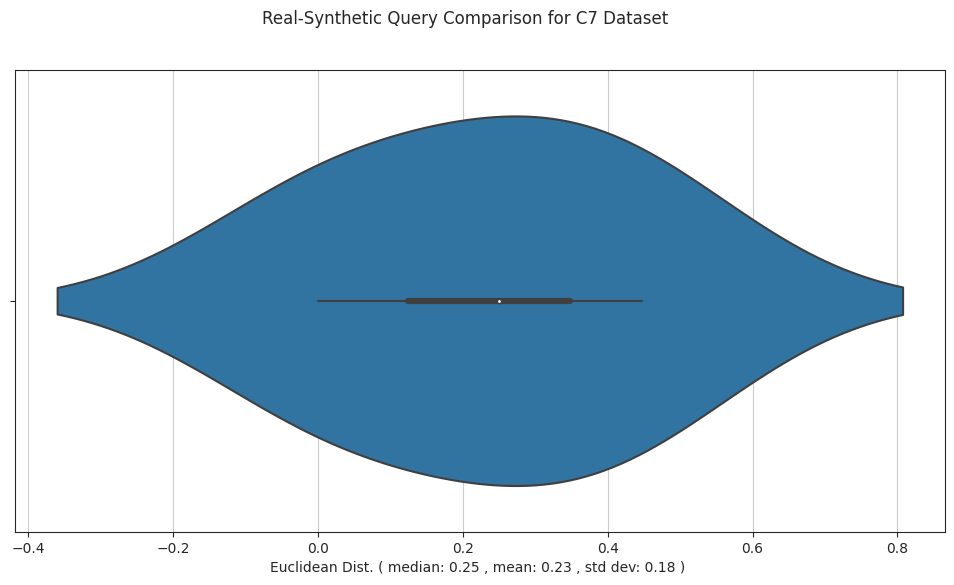

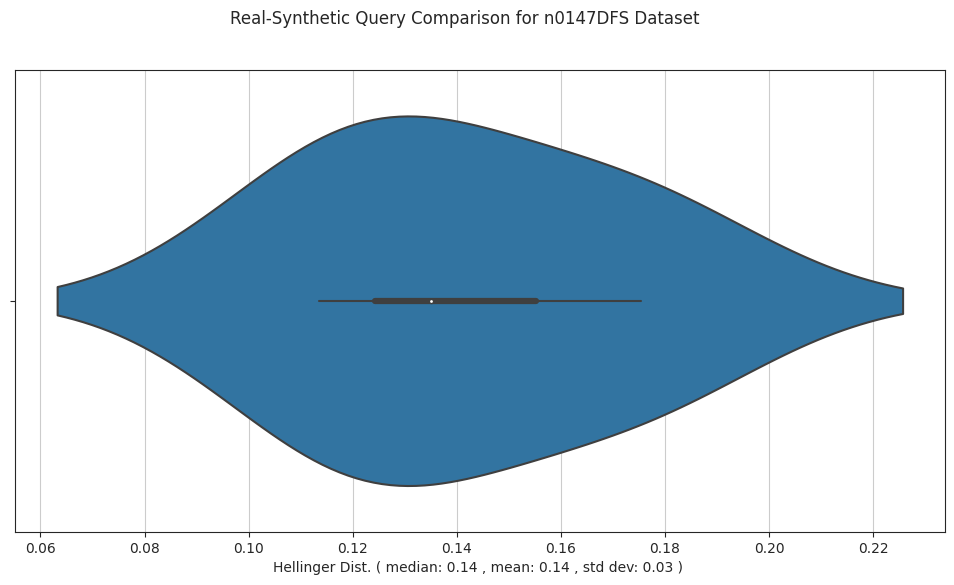

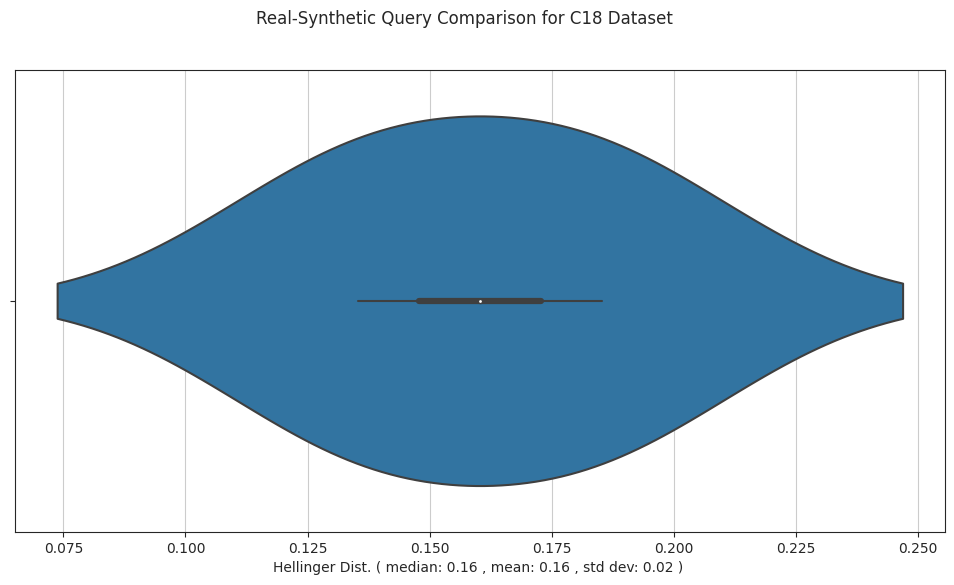

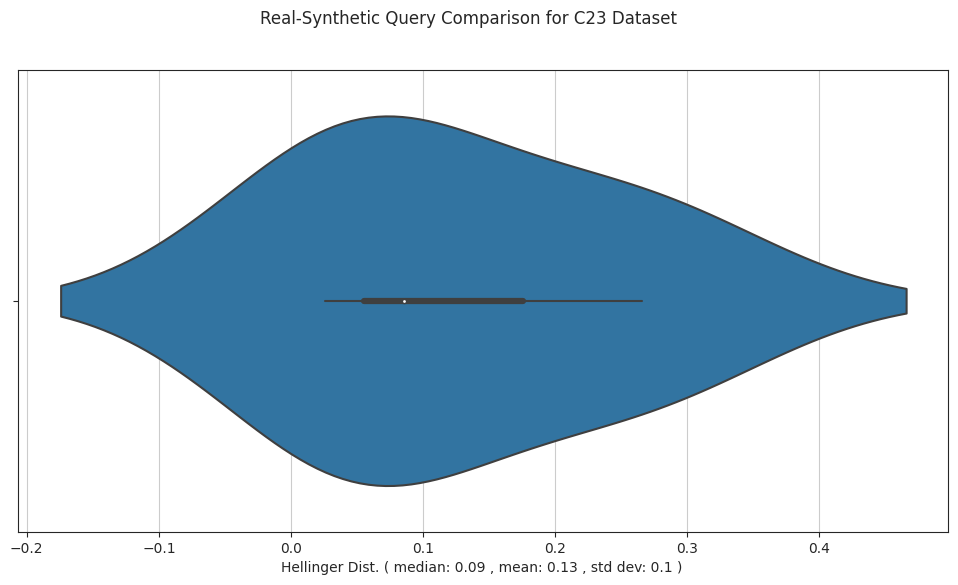

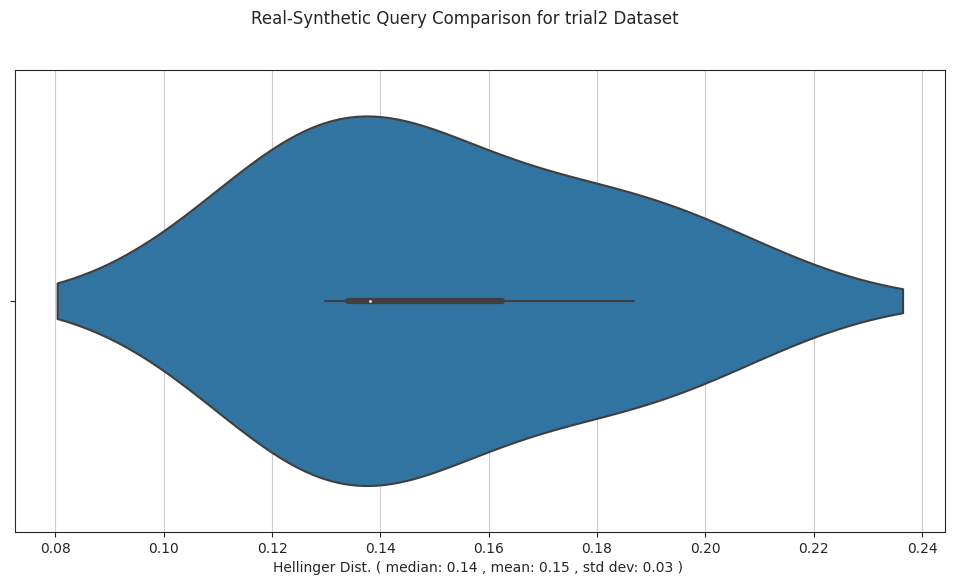

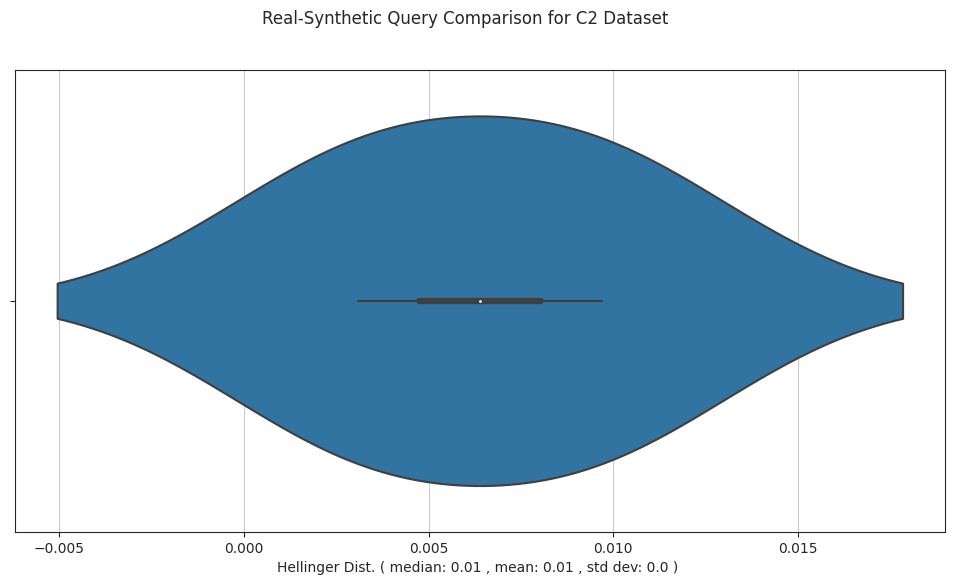

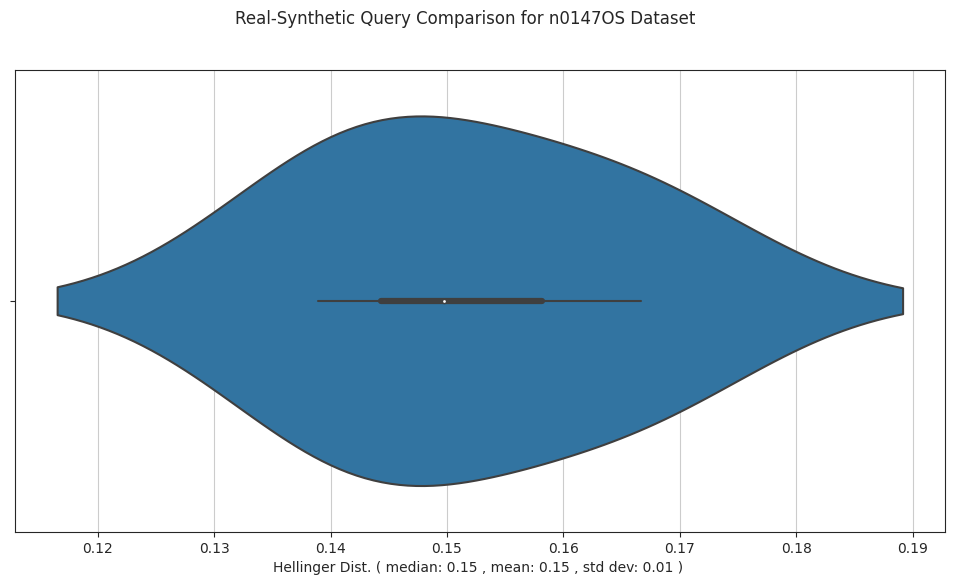

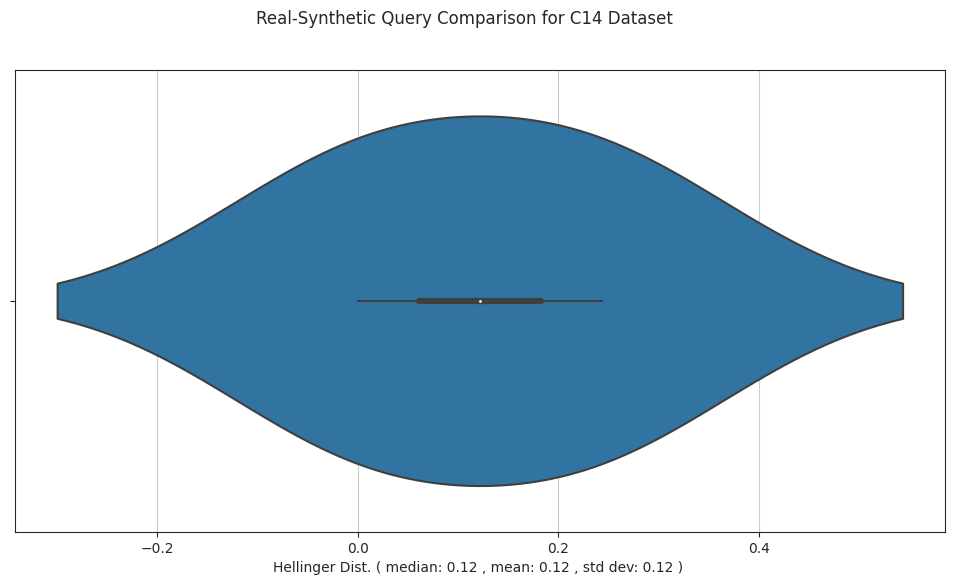

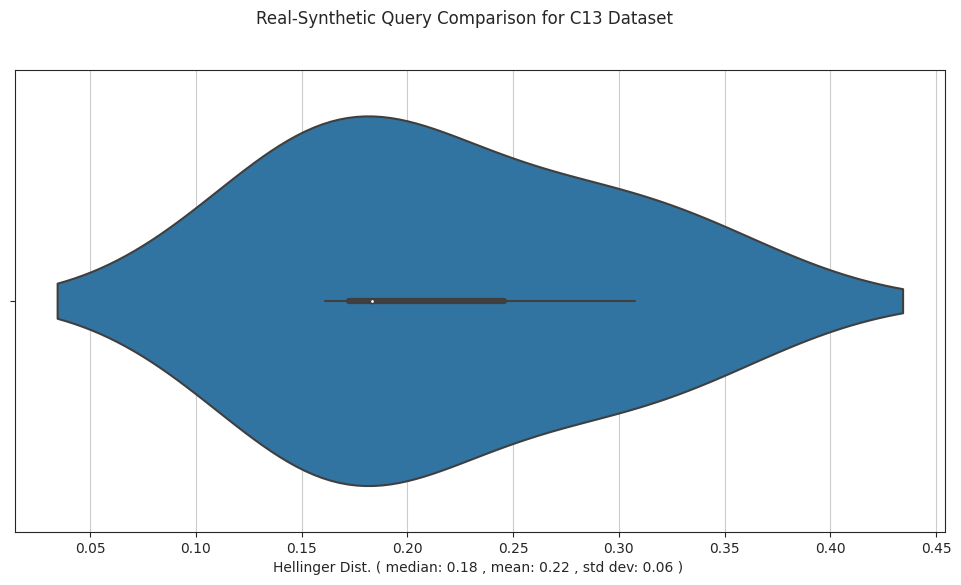

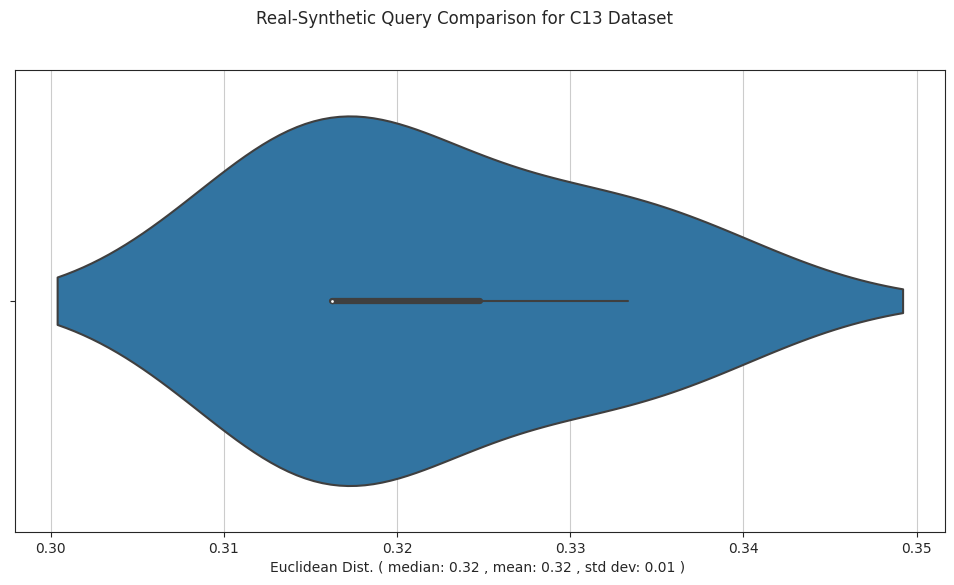

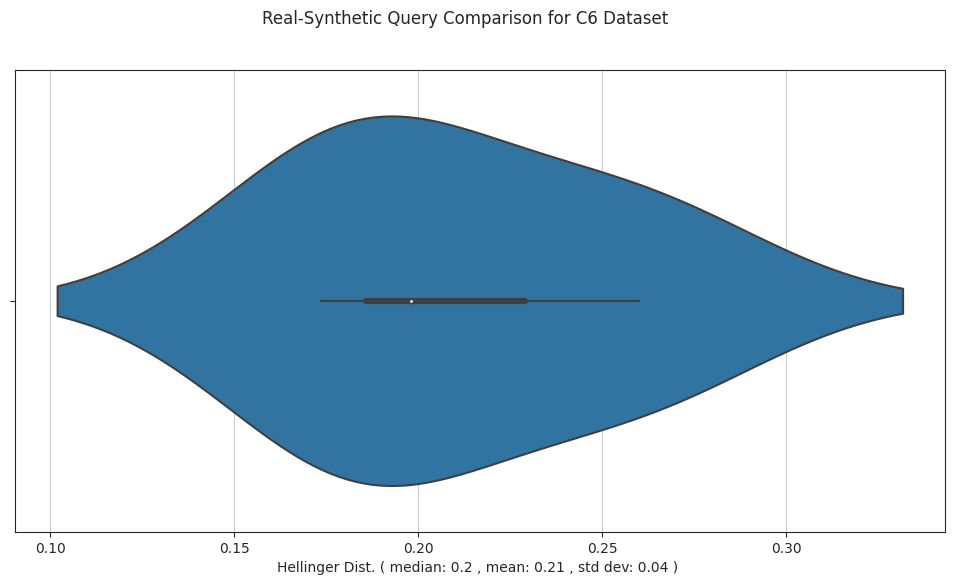

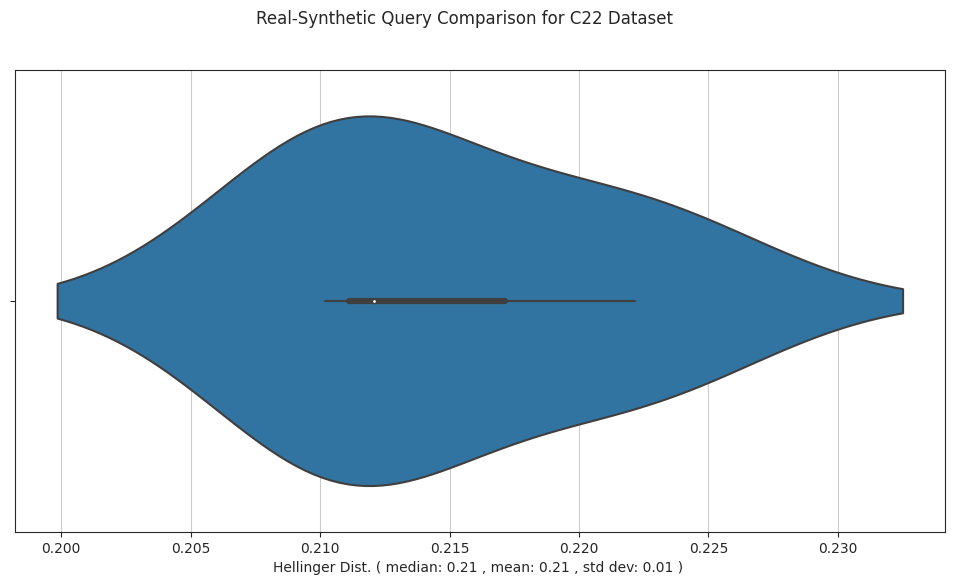

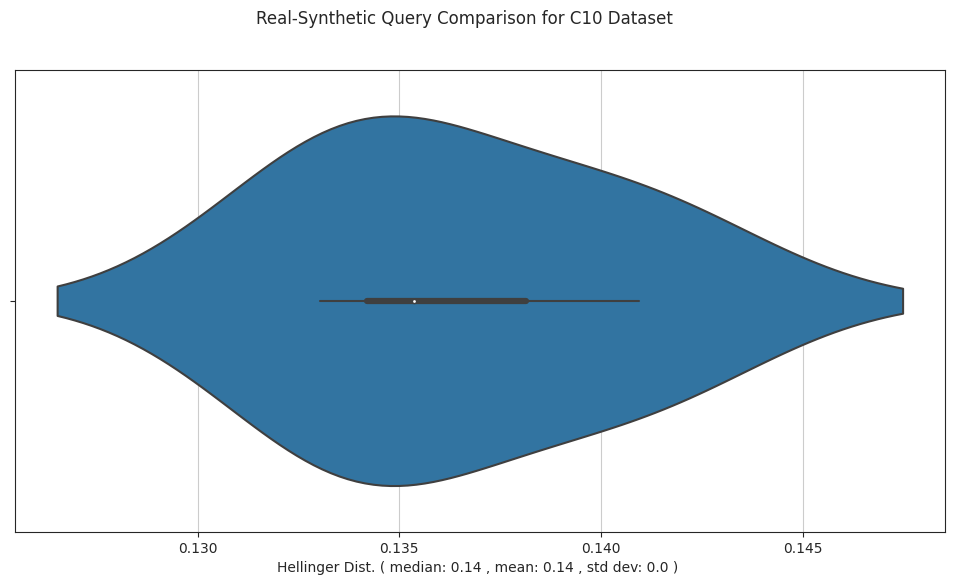

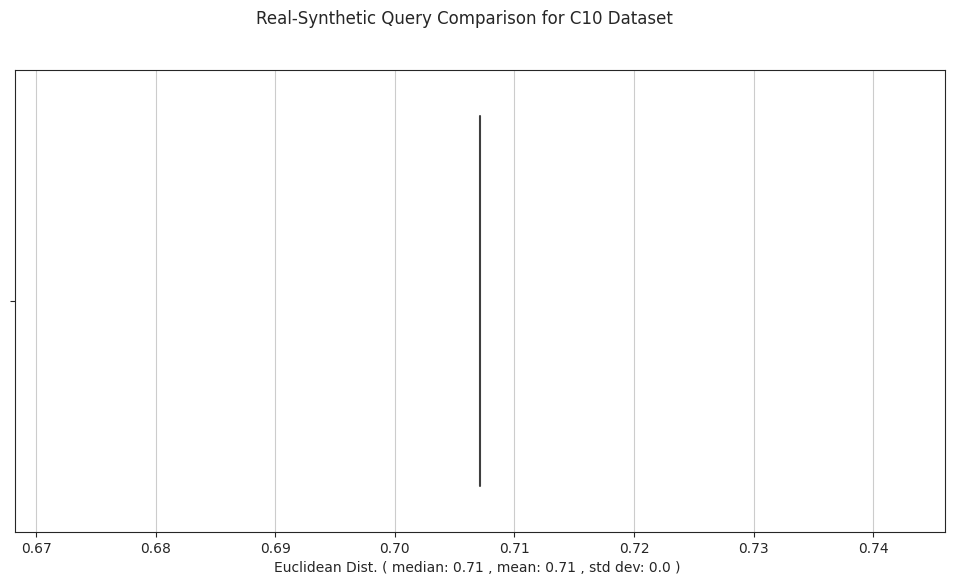

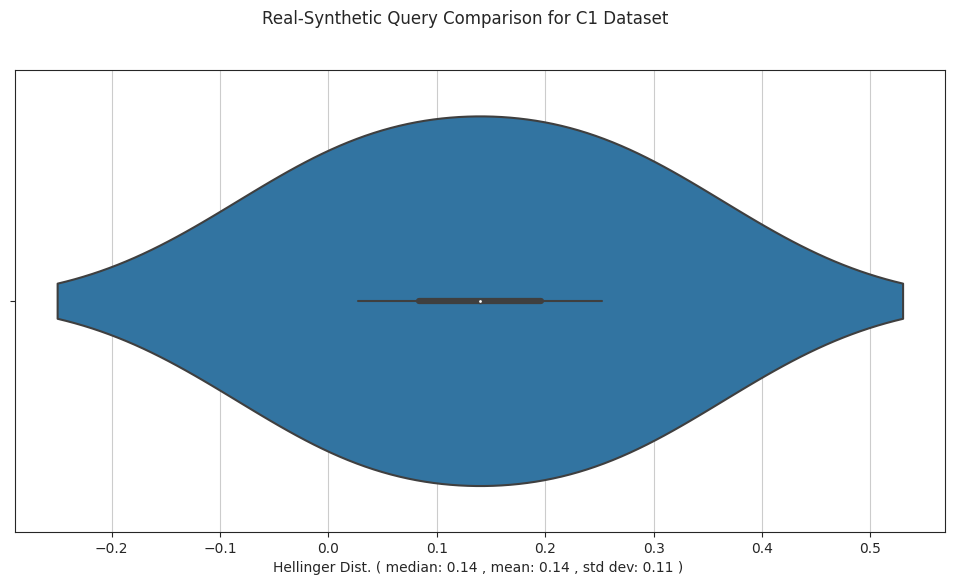

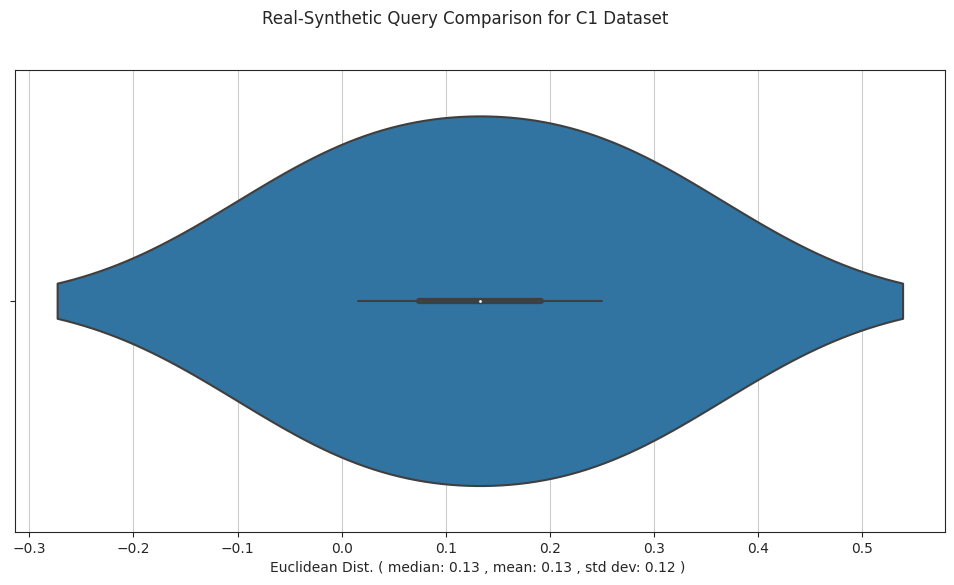

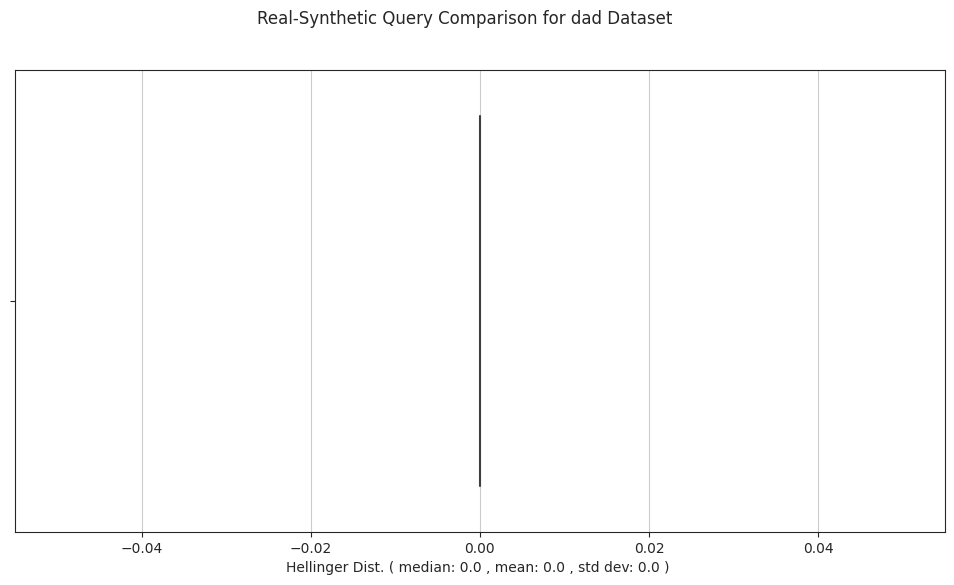

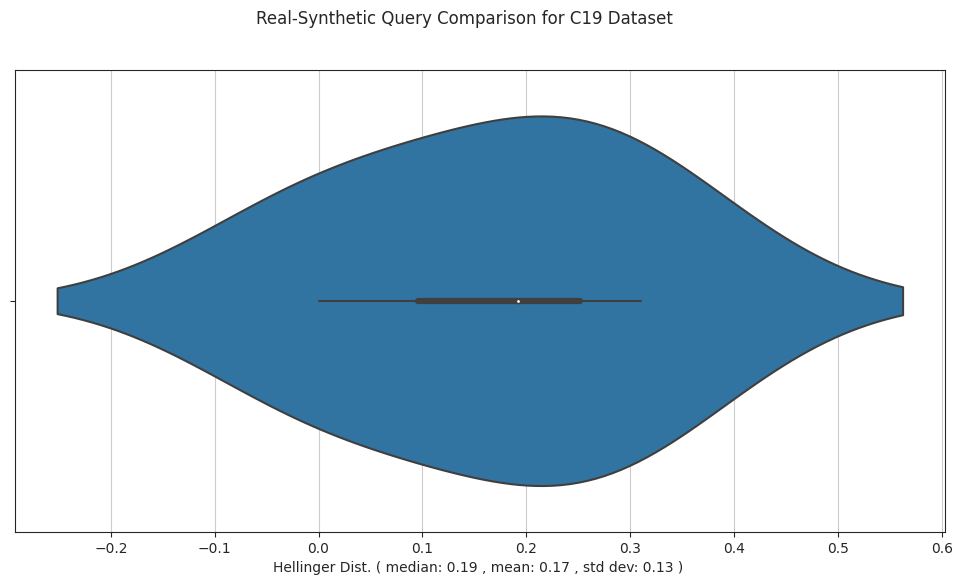

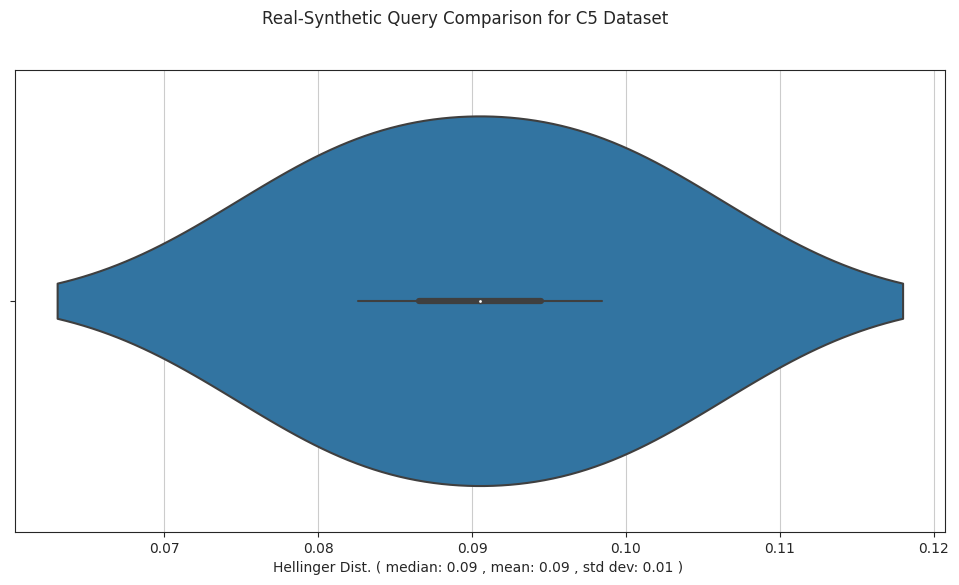

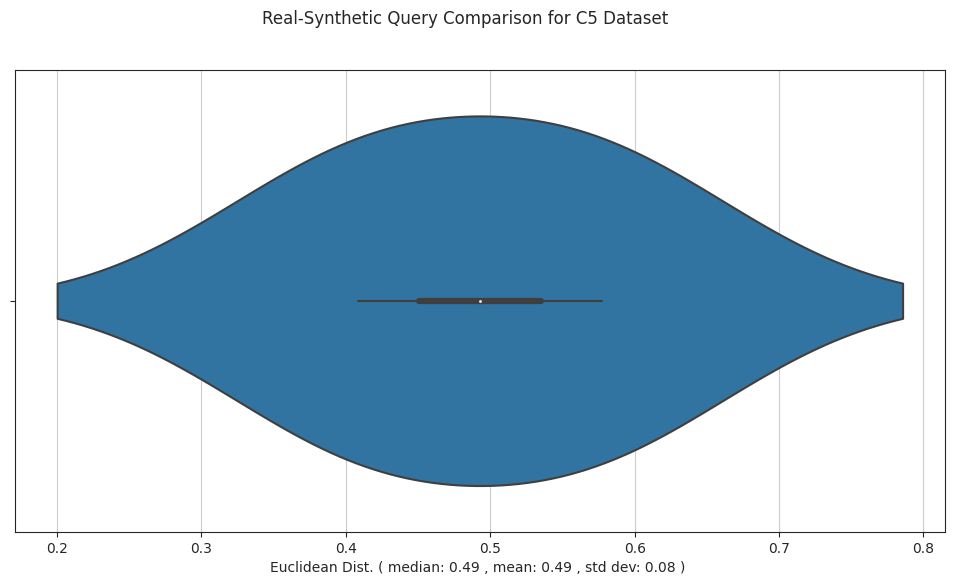

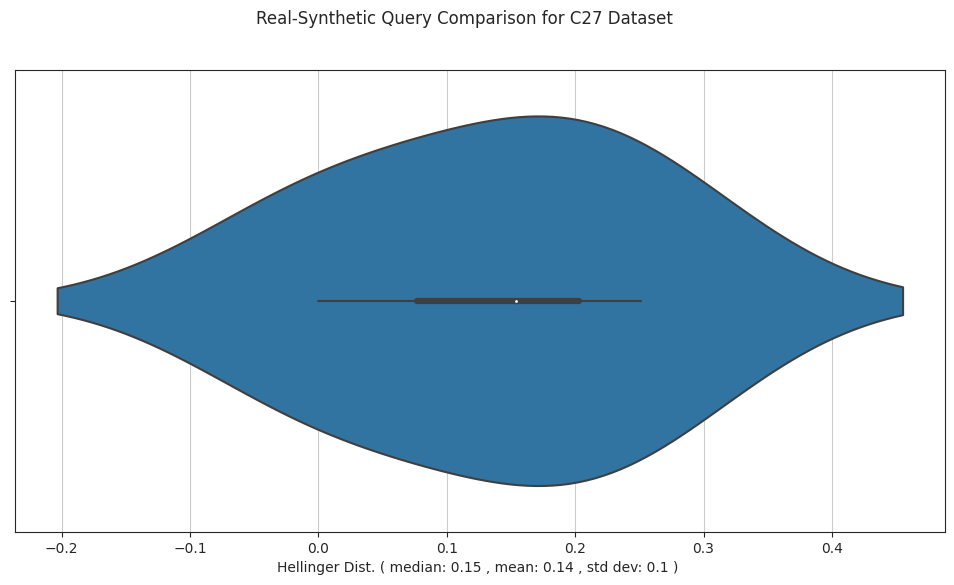

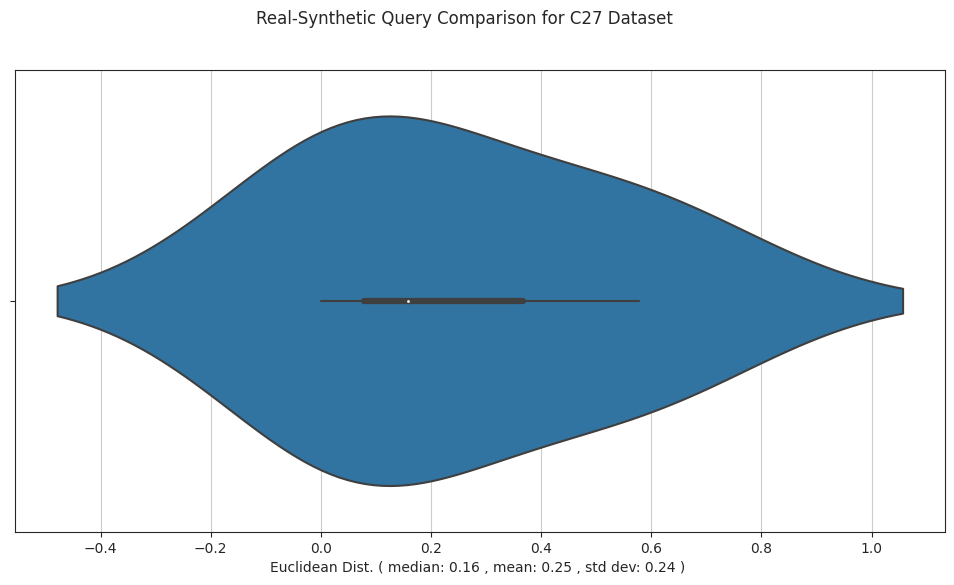

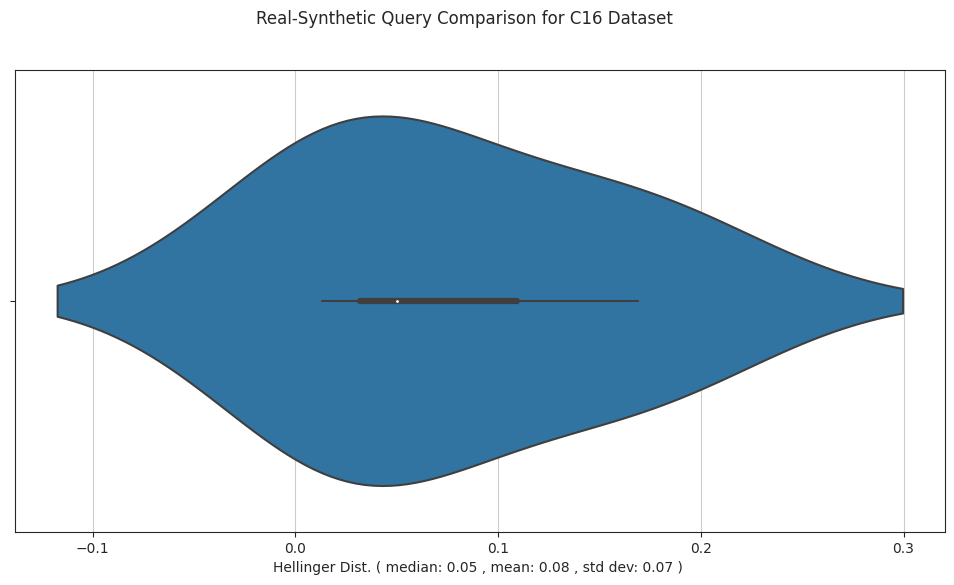

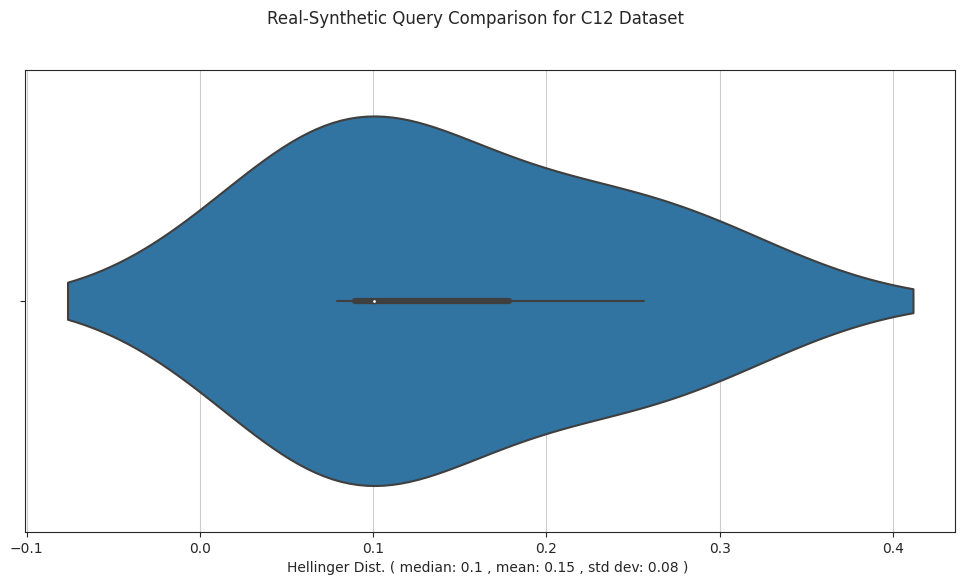

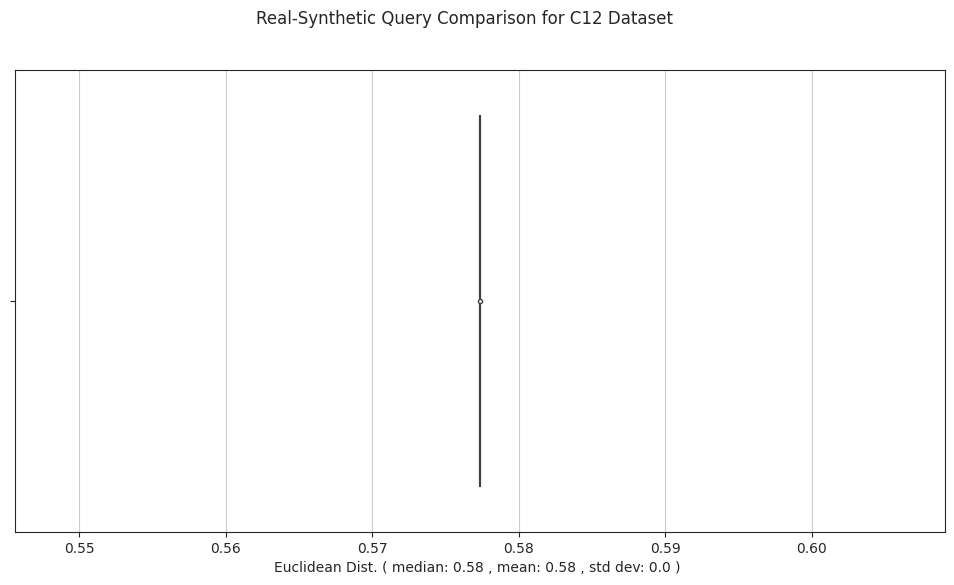

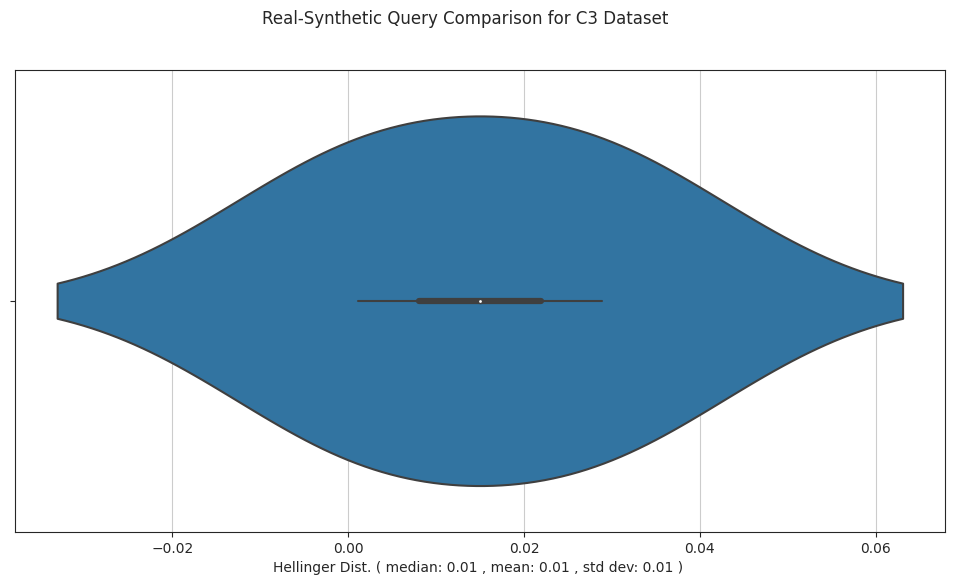

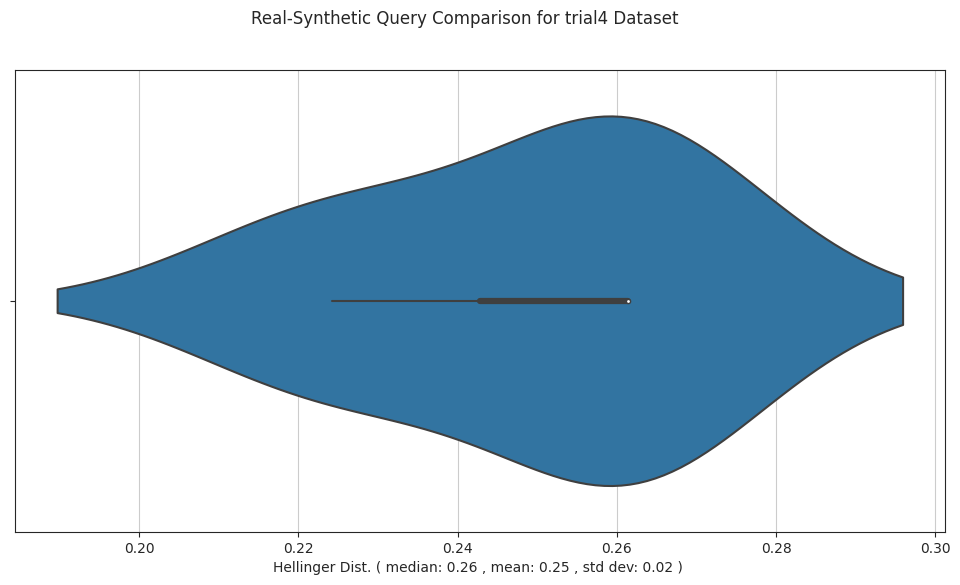

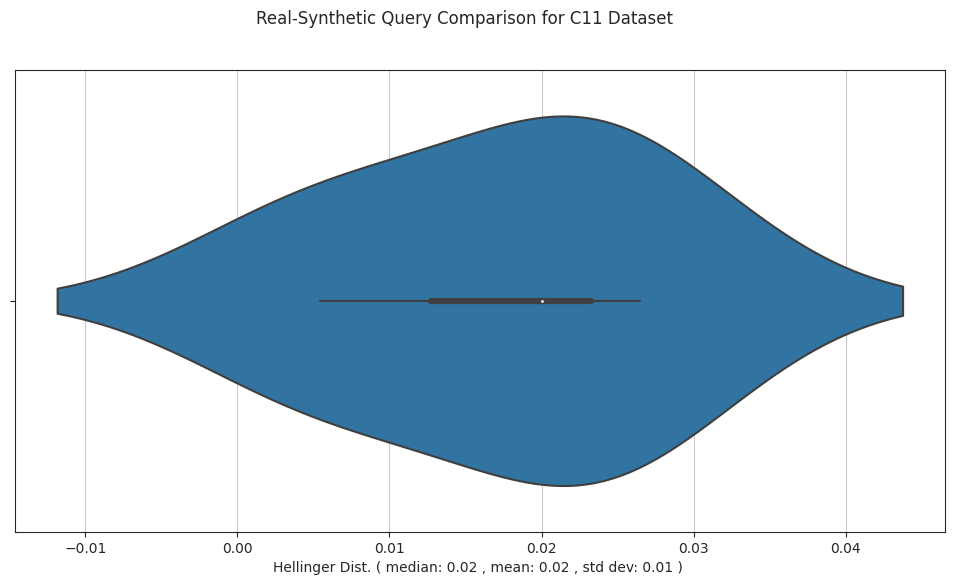

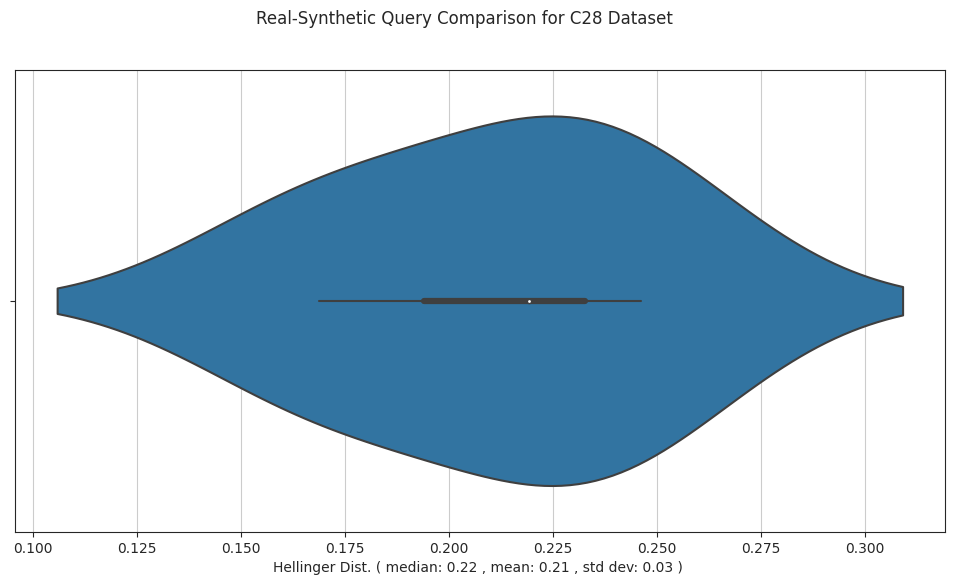

In [4]:
# Fuzz
res={'name':[], 'hlngr_mean':[], 'hlngr_median':[], 'hlngr_std_dev':[], 'ecldn_mean':[], 'ecldn_median':[], 'ecldn_std_dev':[] }
queries=[]

for i,ds_name in enumerate(ds_names):
    # if ds_name !='C25':
    #     continue
    scored_queries=fuzz_tabular(3,'twin_aggfltr', real_path[i], meta_path[i],syn_path[i], '../.runs', True)
    queries.append(scored_queries)
    res['name'].append(ds_name)
    hlngr_stats=calc_stats(scored_queries['hlngr_dist'])
    res['hlngr_mean'].append(hlngr_stats['mean'])
    res['hlngr_median'].append(hlngr_stats['median'])
    res['hlngr_std_dev'].append(hlngr_stats['stddev'])
    ecldn_stats=calc_stats(scored_queries['ecldn_dist'])
    res['ecldn_mean'].append(ecldn_stats['mean'])
    res['ecldn_median'].append(ecldn_stats['median'])
    res['ecldn_std_dev'].append(ecldn_stats['stddev'])

res_df=pd.DataFrame(res)
res_df.to_csv('../.runs/results.csv', index=False)